In [7]:
from datetime import date, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [3]:
start = date(2020, 1, 22)
end = date.today()


df = pd.DataFrame()
while start <= end:
    try:
        df_day = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{start.month:02d}-{start.day:02d}-{start.year}.csv')
        df_day['Date'] = start
        df = df.append(df_day)
    except Exception:
        pass
    start += timedelta(days=1)
    
del df['Last Update']
df.fillna({'Province/State': '', 'Confirmed': 0, 'Deaths': 0, 'Recovered': 0}, inplace=True)

In [4]:
df.tail(5)

,Confirmed,Country/Region,Date,Deaths,Latitude,Longitude,Province/State,Recovered
201,0.0,US,2020-03-10,0.0,34.8405,-106.2485,New Mexico,0.0
202,0.0,US,2020-03-10,0.0,47.5289,-99.7840,North Dakota,0.0
203,0.0,US,2020-03-10,0.0,44.2998,-99.4388,South Dakota,0.0
204,0.0,US,2020-03-10,0.0,38.4912,-80.9545,West Virginia,0.0
205,0.0,US,2020-03-10,0.0,42.7560,-107.3025,Wyoming,0.0


In [5]:
confirmed_by_date = df[df['Country/Region'] == 'US'][['Date', 'Confirmed']].groupby('Date').sum()

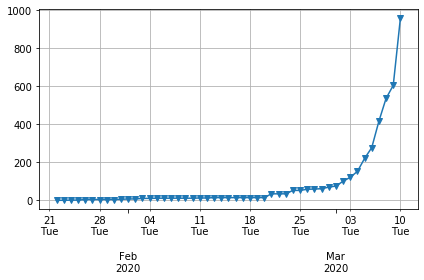

In [8]:
fig, ax = plt.subplots()
ax.plot_date(confirmed_by_date.index, confirmed_by_date, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1), interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()